![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39129299-787f2b38-470a-11e8-958e-84f118846629.jpg"
    style="width:250px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Diabetes Analysis

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

<i>
> Dataset source: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html <br>
> Dataset description: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst
</i>

### Data Set Characteristics

Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. Don't worry, we have you covered; this is the description of each one of the fields in the CSV file:

- **Age**	
- **Sex**	
- **Body mass index**
- **Average blood pressure**
- **S1**
- **S2**
- **S3**
- **S4**
- **S5**
- **S6**

<i>Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).</i>

- Number of Instances: 442
- Number of Attributes:	First 10 columns are numeric predictive values
- Target: Column 11 is a quantitative measure of disease progression one year after baseline

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

Let's start analyzing it!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from seaborn import pairplot

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset <code>diabetes</code> calling sklearn <code>load_diabetes()</code> in a DataFrame structure, also show it's shape and first rows.
        </td>
    </tr>
</table>

In [3]:
# loading the diabetes database from sklearn
diabetes = load_diabetes()
print(diabetes.keys()) # finding the keys of the dataset

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


In [4]:
# starting to get a feel for the data
print(diabetes.feature_names)
print(len(diabetes.feature_names))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
10


In [5]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [6]:
# What form is the dataset in?
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
# making a dataframe from the dataset. 
# diabetes['data'] is the list of list
# diabetes['feature_names'] is the column labels
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
print(df.shape)
df.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
# Need to add the target column to the end to make it 
# easier to do the train test split. 
diabetes.target.shape

(442,)

In [9]:
df['target']=diabetes.target
print(df.shape)
df.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
# More infomation about the data set to get a feel for it.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.639623e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.309912e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.013951e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.289818e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-9.042540e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.301121e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.563971e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.863174e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.848103e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.398488e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [11]:
df.to_csv('Data/df.csv')

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Show a <b>boxplot</b> of each variable, except <code>target</code>.
        </td>
    </tr>
</table>

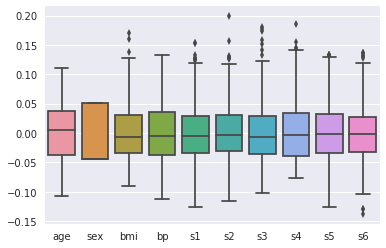

In [12]:
# only want to have a boxplot for the feature name values
sns.boxplot(data=df[diabetes.feature_names])

In [13]:
# Note, this data is already on a very similar scale, 
# so we do not need to normalize it. There is also the 
# chance that this was already normalized since it is 
# a prepared dataset.

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3 a.</span>
            Show the distribution of <code>target</code> column using <b>distplot</b>.
        </td>
    </tr>
</table>

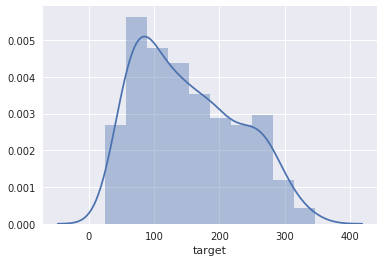

In [14]:
# distplot combines a historgram with kernel density estimate.
# note: the y-axis is a probablity denisty from the kernel density, 
# not a count from the histogram
sns.distplot(df['target'])

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3 b.</span>
            Looking at the Correlations in a table formate and heat map.
        </td>
    </tr>
</table>

In [15]:
# taking a moment to look at how correlated that data is
df.corr().round(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302,0.188
sex,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208,0.043
bmi,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389,0.586
bp,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390,0.441
s1,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326,0.212
s2,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291,0.174
s3,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274,-0.395
s4,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417,0.430
s5,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465,0.566
s6,0.302,0.208,0.389,0.390,0.326,0.291,-0.274,0.417,0.465,1.000,0.382


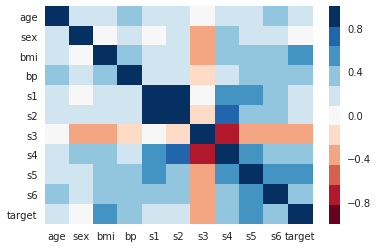

In [16]:
# Can also look at the correlation heatmap
sns.heatmap(df.corr().values, vmin=-1., vmax=1.,
            cmap=plt.cm.get_cmap('RdBu', lut=11),
            xticklabels=list(df.columns),
            yticklabels=list(df.columns))

In [17]:
# As expected there is correlation along the diagonal, 
# S3 is anticorrilated with pretty much everything, and 
# is strongly anticorr with S4. S1 and S1 are strongly
# corr with each other. And S4 and S2 are next strongly
# corr. There are other weaker correlations with the 
# other S#. 

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3 c.</span>
            Looking at the pair wise scatter plots of all the feature combinations.
        </td>
    </tr>
</table>

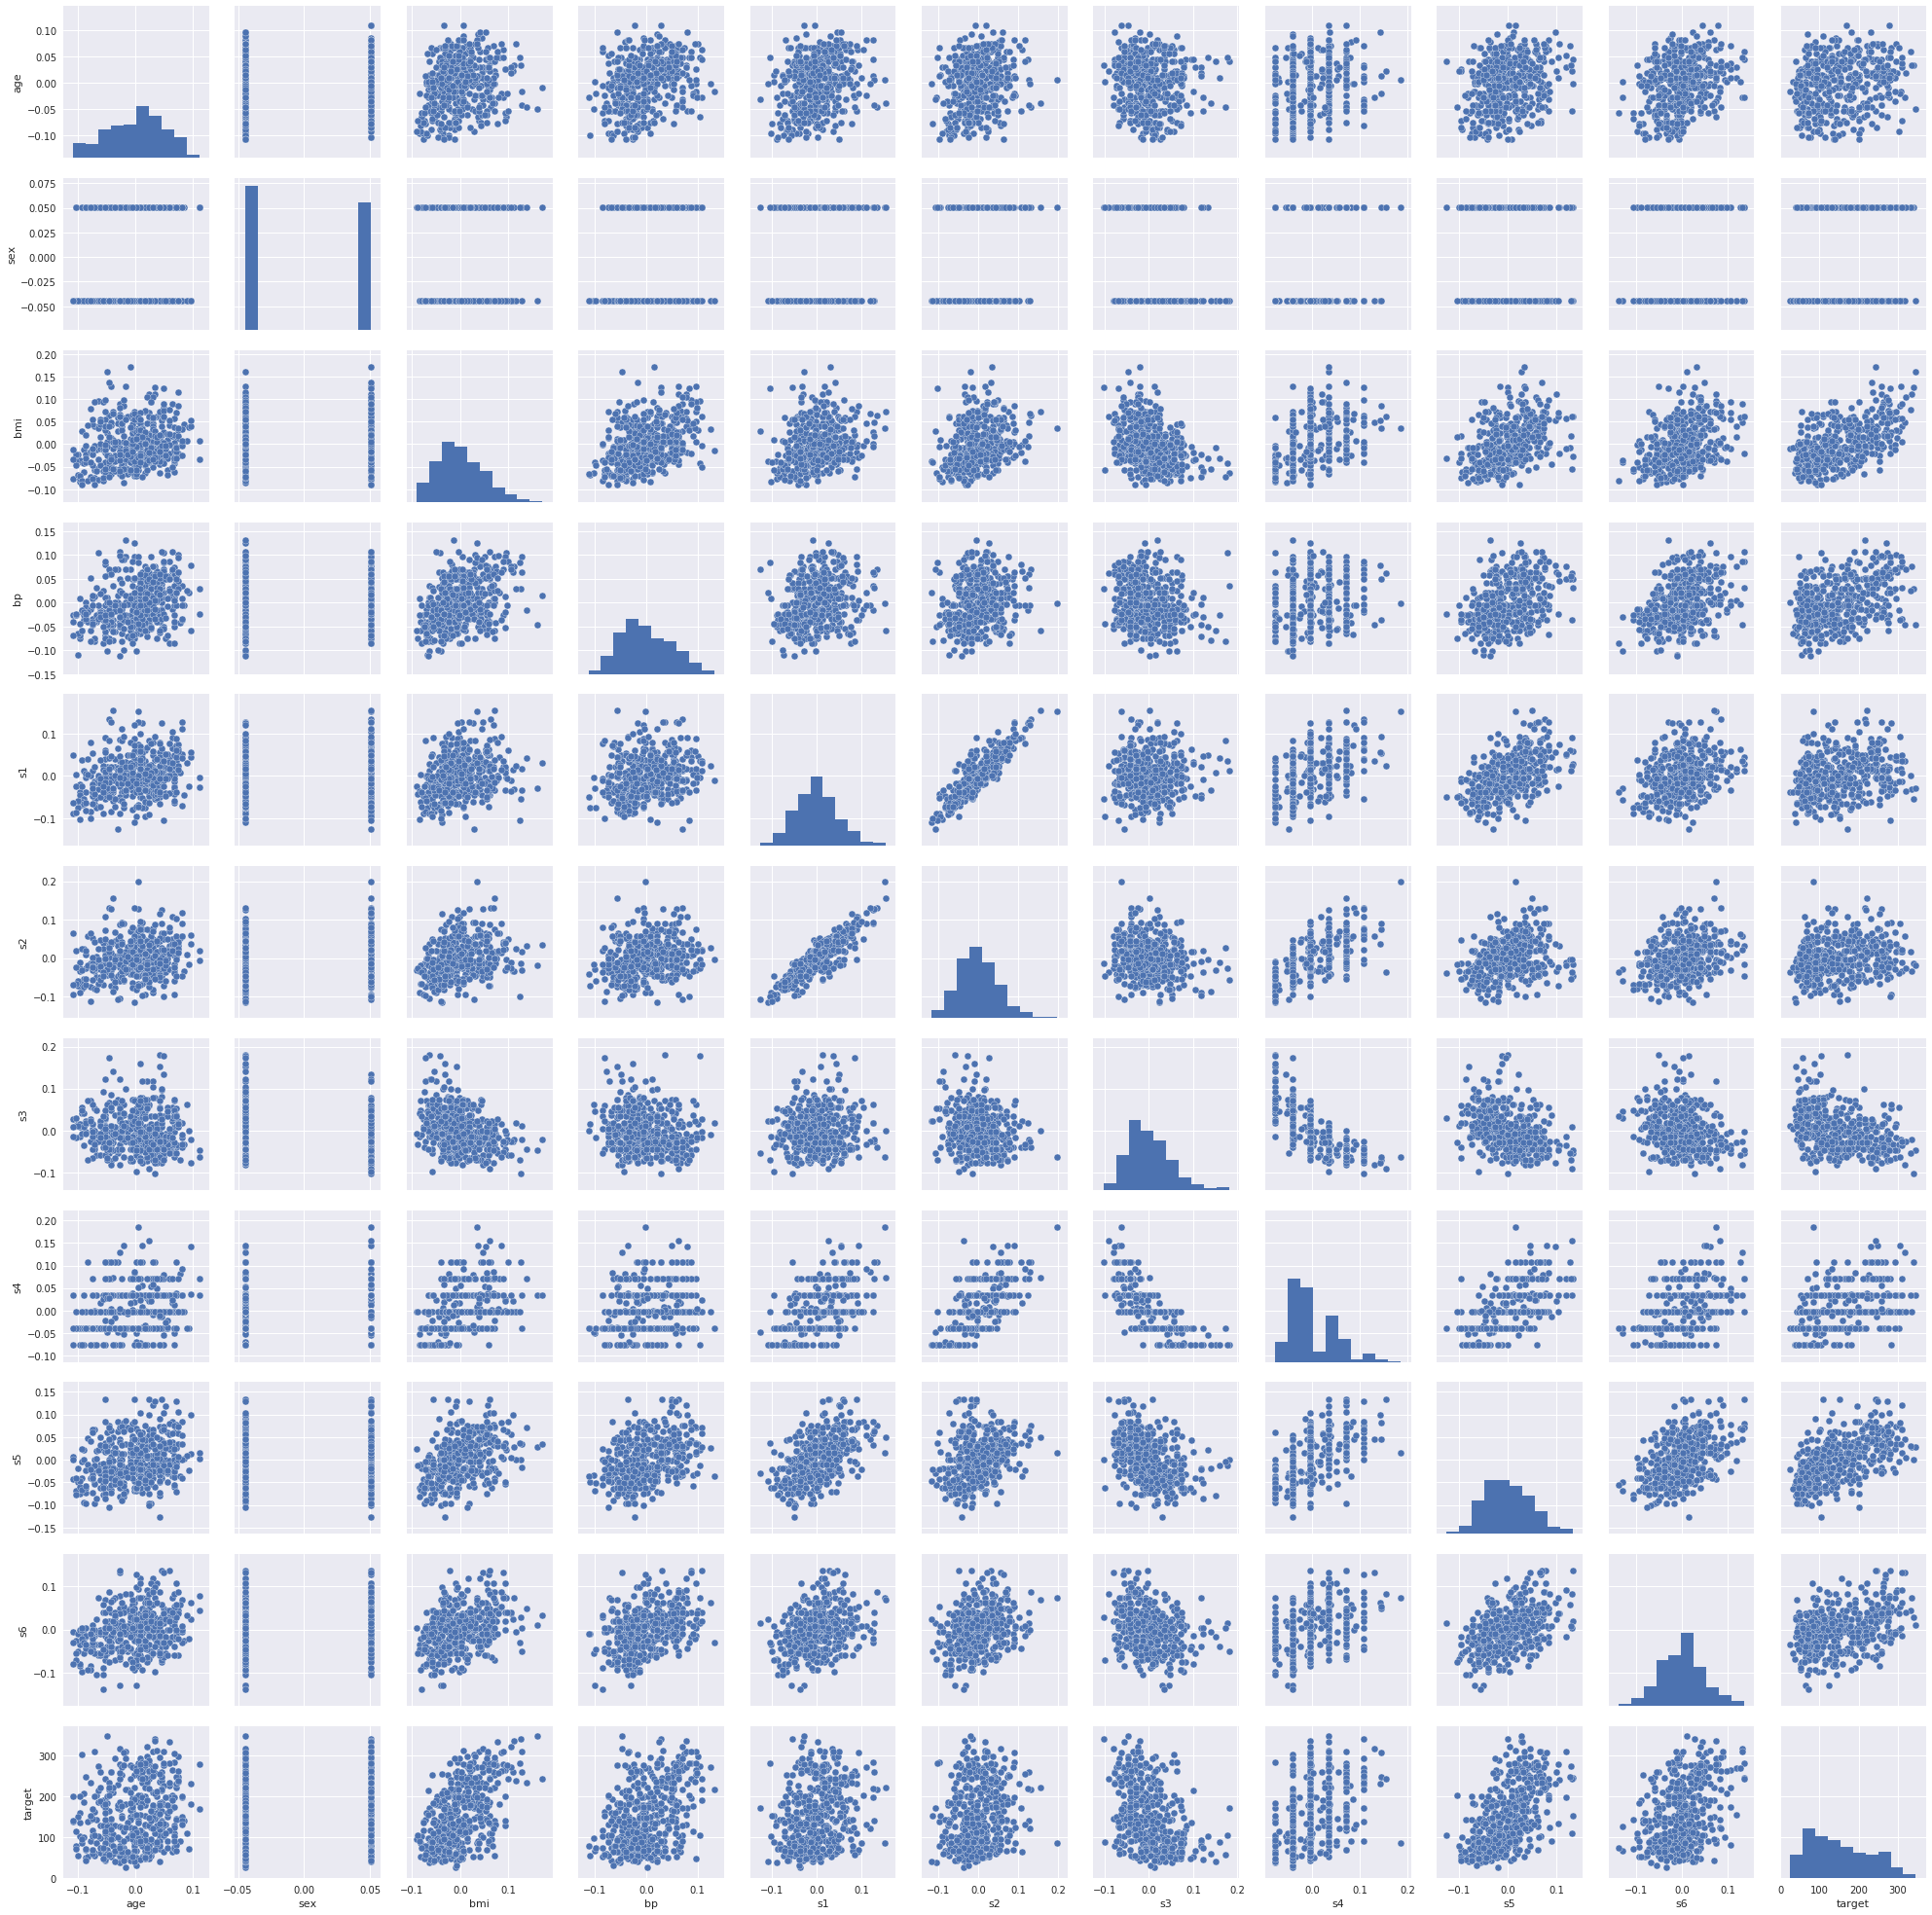

In [18]:
# another way to look at possible multicolinearity is 
# with seaborns pairplot.
pairplot(df)

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Create <b>X</b> with predictor variables, and <b>Y</b> with the target variable. Verify the shape of both X and Y.
        </td>
    </tr>
</table>

In [19]:
# X is the 'perdiction' variable(s) in this case is the 
# feature_data, which are the different measurements of 
# the patient. The 'target' value is the target column in
# this data, which is 'quantitative measure of disease 
# progression one year after baseline' 
X = df[diabetes.feature_names]
Y = df['target']
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

X shape: (442, 10)
Y shape: (442,)


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Create <b>train/test partitions</b> <i>(X_train, X_test, Y_train, Y_test)</i> using sklearn <code>train_test_split</code> function, with <code>test_size=0.3</code>.
        </td>
    </tr>
</table>

In [20]:
# Want to seperate the 70% of the rows of the data that is    
# used to train the model, and the other 30% of the data 
# into data that will be used to test how well your model does. 

from sklearn.model_selection import train_test_split

# Need to make the training and testing variable
# Added random_state so that it is always the same split, for testing 
# different models. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=39)
print('X_train shape: {}, Y_train shape: {}'.format(X_train.shape, Y_train.shape))
print('X_test shape:  {}, Y_test shape:  {}'.format(X_test.shape, Y_test.shape))

X_train shape: (309, 10), Y_train shape: (309,)
X_test shape:  (133, 10), Y_test shape:  (133,)


In [21]:
# coverting the Y_test and Y_train into DataFrame so it is 
# a cleaner format for exporting to csv.
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [22]:
# Exporting data as csv's so that it is ready to use with 
# different models. 
X_train.to_csv('Data/X_train.csv')
X_test.to_csv('Data/X_test.csv')
Y_train.to_csv('Data/Y_train.csv')
Y_test.to_csv('Data/Y_test.csv')

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6a.</span>
            Create a <b>LinearRegression()</b> object and fit it with <code>X_train</code> and  <code>Y_train</code>.
        </td>
    </tr>
</table>

In [23]:
from sklearn.linear_model import LinearRegression
# need to do this to be able to have attributes assinged to it
lr = LinearRegression()  
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6b.</span>
            Look at the resulting equation of the linear regression fit.
        </td>
    </tr>
</table>

In [24]:
# Now lets acutally look at what that means and looks like
print('y-intercept: {}'.format(lr.intercept_.round(1)))
print('coeffiecients of X: ', lr.coef_.round(1))

y-intercept: [151.5]
coeffiecients of X:  [[ -59.7 -303.3  558.4  319.5 -783.3  316.7  223.   352.2  770.2   59.9]]


In [25]:
# Making a dataframe with the results of the OLS so it can be used to compare
# different models. 
coef = [coef for sublist in lr.coef_ for coef in sublist]
_df_coef = pd.DataFrame(data={'sklearn': coef}, index=diabetes.feature_names)
_df_yint = pd.DataFrame(data={'sklearn': lr.intercept_}, index=['y-intercept'])
df_res = _df_yint.append(_df_coef)
df_res.round(3)

,sklearn
y-intercept,151.531
age,-59.678
sex,-303.298
bmi,558.369
bp,319.486
s1,-783.279
s2,316.650
s3,222.998
s4,352.210
s5,770.213


In [26]:
df_res.to_csv('Data/df_res.csv')

In [27]:
# looking at the different X coeffients and how important each 
# variable is to prediciting the target.

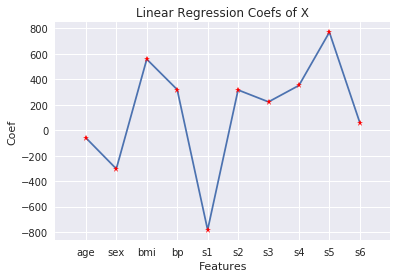

In [28]:
plt.title('Linear Regression Coefs of X')
plt.xlabel('Features')
plt.ylabel('Coef')
plt.xlim(-1, len(df[diabetes.feature_names].columns))
plt.xticks(range(len(df[diabetes.feature_names].columns)), df[diabetes.feature_names].columns)
_ = plt.plot(lr.coef_.reshape(X.shape[1]), '-', lr.coef_.reshape(X.shape[1]), 'r*')

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Now <code>predict</code> new values using <i>X_test</i>.
        </td>
    </tr>
</table>

In [29]:
Y_pred = lr.predict(X_test)

In [30]:
Y_pred[:6]

array([[143.40134325],
       [216.83642267],
       [110.52377636],
       [166.30853363],
       [294.64931948],
       [ 78.77682144]])

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Check <code>r2_score</code> and <code>mean_absolute_error</code> of your prediction.
        </td>
    </tr>
</table>

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(Y_test, Y_pred).round(2)))
print('Variance score (R^2): {}'.format(r2_score(Y_test, Y_pred).round(4)))

Mean Absolute Error (MAE): 45.54
Variance score (R^2): 0.4392


---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show a <code>scatter</code> with <code>Y_test</code> over predicted values, and draw a line of the predicted values.
        </td>
    </tr>
</table>

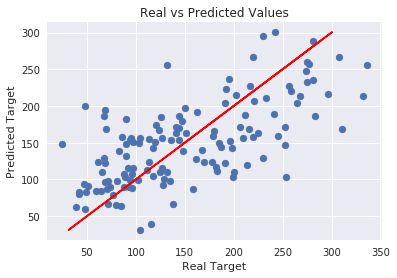

In [32]:
plt.title('Real vs Predicted Values')
plt.xlabel('Real Target')
plt.ylabel('Predicted Target')

plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red')

In [33]:
# these look slightly different because we have a different
# set of random data that was used to train the model.

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            Go further and make a <b>CrossValidation</b> evaluation using <b>10 k-fold</b>. Show the mean of all the errors using <code>cross_val_score</code>.
        </td>
    </tr>
</table>

In [34]:
# Cross validation is important for checking to make sure your
# data is not being over or underfit. What happens is the training
# data is split up into n-folds which are each used to train the 
# model in a 'step' like function.

In [35]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
scores = cross_val_score(lr, X_test, Y_test, scoring='neg_mean_absolute_error', cv=KFold(shuffle=True))

print('MAE: {}'.format(scores.round(1)))
print('MAE_mean: {}'.format(scores.mean().round(1)))

MAE: [-47.  -45.3 -50.5]
MAE_mean: -47.6
